In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn import cross_validation, grid_search, metrics
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
# URL to dataset
dataUrl = 'https://raw.githubusercontent.com/kug3lblitz/Heat-Replay/master/src/data/final/final.csv'

# Load the dataset
df = pd.read_csv(dataUrl)

In [3]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,curses,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9885,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9971,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9789,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9081,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,0.2533,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


### Random Forest

In [4]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier()

In [10]:
def sentiment(row):

    if row['sentiment'] < 0:
        return -1
    elif row['sentiment'] == 0:
        return 0
    elif row['sentiment'] > 0:
        return 1

def reading_score(row):

    if row['reading_score'] < 3:
        return 0
    elif row['reading_score'] >= 3:
        return 1


# df['test'] = df.apply(sentiment, axis=1)
df['test'] = df.apply(reading_score, axis=1)

In [14]:
# create dummy variables for `DAY_OF_WEEK` feature
# this check allows this code to be run multiple times
if 'test' in df.columns:
    # get dummy variables for DAY_OF_WEEK
    df_new = df.join(pd.get_dummies(df['test'], prefix='test'))
    # remove DAY_OF_WEEK column
    df_new.drop(['test'], axis=1, inplace=True)

# list of features to use to build model
features = [i for i in df_new.columns if 'test_' in i]
features += ['verbs']
print features

['test_0', 'test_1', 'verbs']


In [15]:
# set X and y and build model
X = df_new[features]
y = df_new['charted']

# train model
rf = ensemble.RandomForestClassifier(n_estimators=512)
rf.fit(X, y)
# predict
df_new['probability'] = rf.predict_proba(X).T[1]

[(0.0, 0.0, 0.5, 1.0), (0.5, 0.0, 0.0, 1.0)]
3904


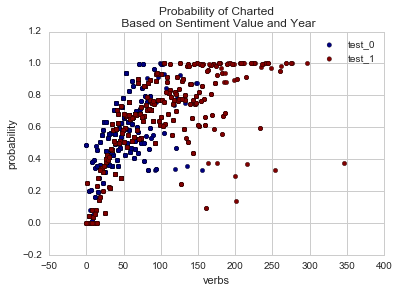

In [16]:
# plot
ax = plt.subplot(111)
labels = [i for i in df_new.columns if 'test_' in i]
from matplotlib import cm
colors = [ cm.jet(x) for x in np.linspace(0, 1, len(labels)) ]
print colors
print len(df_new)
for i, v in enumerate(labels):
    df_new[df_new[features[i]] == 1].plot(
        x='verbs', y='probability', kind='scatter', label=v, color=colors[i], ax=ax
    )

ax.set(title='Probability of Charted\n Based on Sentiment Value and Verbs')
plt.legend(loc='upper right')